In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

from sklearn.utils import shuffle

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
train_xdata = np.array([np.reshape(x, (28,28,1)) for x in mnist.train.images])        #image files(channel = 1)
test_xdata = np.array([np.reshape(x, (28,28,1)) for x in mnist.test.images])
train_labels = mnist.train.labels
test_labels = mnist.test.labels

In [3]:
#128걸음씩 12바퀴 돌린다는 의미.

batch_size = 128
num_classes = 10            #one-hot code 10개
epochs = 12 

img_rows, img_cols = (28,28)

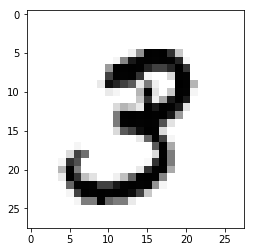

In [8]:
plt.imshow(train_xdata[1, :, :, 0], cmap='Greys')

In [12]:
print(train_xdata.shape)
print(test_xdata.shape)
print(train_labels.shape)
print(test_labels.shape)

(55000, 28, 28, 1)
(10000, 28, 28, 1)
(55000, 10)
(10000, 10)


In [27]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras

model = Sequential()
model.add( Conv2D(32, kernel_size = (4,4), activation = 'relu', input_shape = (28,28,1) ))
       # 32 = filter number 1 (FN1), # bias(Conv2D 에서 더해준다.)
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (4,4), activation = 'relu', input_shape = (14, 14, 32) ))
     # filter 개수(FN1)가 채널의 개수가 된다. 
model.add(MaxPooling2D(pool_size = (2,2)))

##### Affine(완전 연결 계층) layer #####
#affine layer만들기 위해 1차원으로 평활(flatten)

model.add(Flatten())     # 맨 마지막 모델을 flatten해준다.

#Dense layer(Affine(완전 연결 계층) layer 1)
model.add(Dense(128, activation = 'relu'))       # input은 쓰지 않아도 됨. output만 써준다. 128 = FCS1(final_conv_size_1)
# Affine layer 2
model.add(Dense(num_classes, activation = 'softmax'))



In [29]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])

In [30]:
model.fit(train_xdata, train_labels, batch_size=batch_size, verbose=1, epochs=2)         
           # batch size =128, verbose=1이면 과정을 출력.

Epoch 1/2
55000/55000 [==============================] - 40s 728us/step - loss: 0.2382 - acc: 0.9253
Epoch 2/2
55000/55000 [==============================] - 40s 733us/step - loss: 0.0570 - acc: 0.9821


In [31]:
## dropout

In [32]:
model = Sequential()
model.add( Conv2D(32, kernel_size = (4,4), activation = 'relu', input_shape = (28,28,1) ))
       # 32 = filter number 1 (FN1), # bias(Conv2D 에서 더해준다.)
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (4,4), activation = 'relu', input_shape = (14, 14, 32) ))
     # filter 개수(FN1)가 채널의 개수가 된다. 
model.add(MaxPooling2D(pool_size = (2,2)))

##### Affine(완전 연결 계층) layer #####
#affine layer만들기 위해 1차원으로 평활(flatten)

model.add(Flatten())     # 맨 마지막 모델을 flatten해준다.

#Dense layer(Affine(완전 연결 계층) layer 1)
model.add(Dropout(0.25))     #dropout
model.add(Dense(128, activation = 'relu'))       # input은 쓰지 않아도 됨. output만 써준다. 128 = FCS1(final_conv_size_1)

# Affine layer 2
model.add(Dropout(0.5))      #dropout
model.add(Dense(num_classes, activation = 'softmax'))

In [33]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])
model.fit(train_xdata, train_labels, batch_size=batch_size, verbose=1, epochs=2)  

Epoch 1/2
55000/55000 [==============================] - 44s 795us/step - loss: 0.3204 - acc: 0.8981
Epoch 2/2
55000/55000 [==============================] - 43s 790us/step - loss: 0.1003 - acc: 0.9692


In [34]:
model.evaluate(test_xdata, test_labels, verbose=0)

[0.04236436659682077, 0.9866]

In [35]:
# 다시 dropout없이
model = Sequential()
model.add( Conv2D(32, kernel_size = (4,4), activation = 'relu', input_shape = (28,28,1) ))
       # 32 = filter number 1 (FN1), # bias(Conv2D 에서 더해준다.)
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (4,4), activation = 'relu', input_shape = (14, 14, 32) ))
     # filter 개수(FN1)가 채널의 개수가 된다. 
model.add(MaxPooling2D(pool_size = (2,2)))

##### Affine(완전 연결 계층) layer #####
#affine layer만들기 위해 1차원으로 평활(flatten)

model.add(Flatten())     # 맨 마지막 모델을 flatten해준다.

#Dense layer(Affine(완전 연결 계층) layer 1)
model.add(Dense(128, activation = 'relu'))       # input은 쓰지 않아도 됨. output만 써준다. 128 = FCS1(final_conv_size_1)
# Affine layer 2
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])
model.fit(train_xdata, train_labels, batch_size=batch_size, verbose=1, epochs=2)  

Epoch 1/2
55000/55000 [==============================] - 42s 772us/step - loss: 0.2308 - acc: 0.9272
Epoch 2/2
55000/55000 [==============================] - 41s 742us/step - loss: 0.0581 - acc: 0.9821


In [36]:
model.evaluate(test_xdata, test_labels, verbose=0)      #dropout 안한 것이 더 좋다.

[0.03676890652682632, 0.9878]

In [37]:
## 어떤 게 맞고 어떤 게 틀렸는지 그림 그리기

In [ ]:
a = model.predict(test_xdata)
Nrow=3
Ncol=4     #한번에 12개 그림 그린다.
for i in range(12):
    plt.subplot(Nrow, Ncol, i+1)
    plt.imshow(test_xdata[i,:,:,0])
    
pred_my = np.argmax(a[0:100, ], axis=1)     
actual_my = np.argmax(test_labels[0:100, ], axis=1)

b = -np.equal(pred_my, actual_my)

In [45]:
b[18]

False

In [46]:
pred_my[18]

8

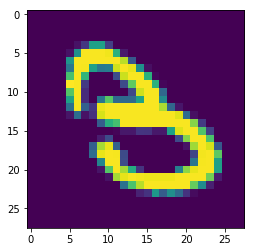

In [47]:
plt.imshow(test_xdata[18,:,:,0])

In [50]:
np.where(b==False)

(array([18]),)

In [52]:
c = np.array(b)

In [ ]:
d = c[b]

In [55]:
model = Sequential()
model.add( Conv2D(32, kernel_size = (5,5), activation = 'relu', input_shape = (28,28,1) ))
       # 32 = filter number 1 (FN1), # bias(Conv2D 에서 더해준다.)
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (4,4), activation = 'relu', input_shape = (14, 14, 32) ))
     # filter 개수(FN1)가 채널의 개수가 된다. 
model.add(MaxPooling2D(pool_size = (2,2)))

##### Affine(완전 연결 계층) layer #####
#affine layer만들기 위해 1차원으로 평활(flatten)

model.add(Flatten())     # 맨 마지막 모델을 flatten해준다.

#Dense layer(Affine(완전 연결 계층) layer 1)
model.add(Dense(128, activation = 'relu'))       # input은 쓰지 않아도 됨. output만 써준다. 128 = FCS1(final_conv_size_1)
# Affine layer 2
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])
model.fit(train_xdata, train_labels, batch_size=batch_size, verbose=1, epochs=2)  
 

Epoch 1/2
55000/55000 [==============================] - 45s 818us/step - loss: 0.2257 - acc: 0.93041s - loss: 0.231
Epoch 2/2
55000/55000 [==============================] - 43s 787us/step - loss: 0.0553 - acc: 0.9823


In [56]:
model.evaluate(test_xdata, test_labels, verbose=0)

[0.04033238738840446, 0.9868]